In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
dog_pack = pd.read_csv('dogs.csv')

In [39]:
dog_pack

,name,breed,color,height_cm,weight_kg
0,Bella,Labrador,Brown,56,25
1,Charlie,Poodle,Black,43,23
2,Lucy,Chow Chow,Brown,46,22
3,Cooper,Schnauzer,Grey,49,17
4,Max,Labrador,Black,59,29
5,Stella,Chihuahua,Tan,18,2
6,Bernie,St. Bernard,White,77,74


### Histograms

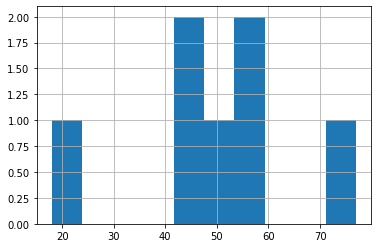

In [7]:
dog_pack["height_cm"].hist()

**By looking at the histogram, we can see that there are a lot of dogs around 40-60 cm tall**

### Adjusting the number of bars, or bins

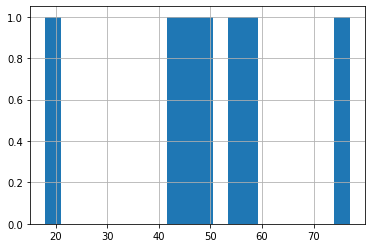

In [8]:
dog_pack['height_cm'].hist(bins = 20)

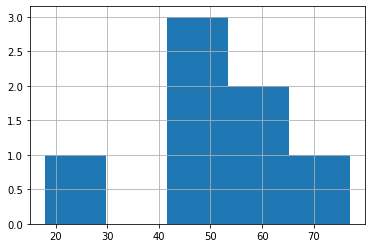

In [9]:
dog_pack['height_cm'].hist(bins = 5)

**Increasing/decreasing the number of bins give us a better idea of what the distribution looks like**

### Bar Plots

In [10]:
avg_weight_by_breed = dog_pack.groupby("breed")["weight_kg"].mean()
avg_weight_by_breed

breed
Chihuahua       2
Chow Chow      22
Labrador       27
Poodle         23
Schnauzer      17
St. Bernard    74
Name: weight_kg, dtype: int64

### Bar plots can reveal relationships between a categorical variable and a numeric variable, like breed(categorical) and weight(numerical)

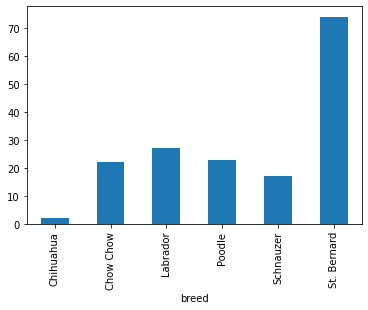

In [11]:
avg_weight_by_breed.plot(kind = "bar")

**Bar plot from the mean weights**

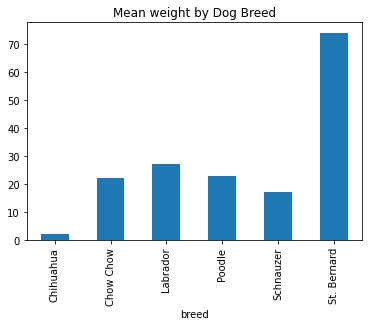

In [12]:
# To add title
avg_weight_by_breed.plot(kind = "bar", title = "Mean weight by Dog Breed")

**Looks like Saint Bernards are the heaviest breed on average!**

### Line Plots
Line plots are great for visualizing changes in numeric variables over time.

In [13]:
dog_pack.head()

,name,breed,color,height_cm,weight_kg
0,Bella,Labrador,Brown,56,25
1,Charlie,Poodle,Black,43,23
2,Lucy,Chow Chow,Brown,46,22
3,Cooper,Schnauzer,Grey,49,17
4,Max,Labrador,Black,59,29


In [19]:
sully = pd.DataFrame({"date": ["2019-01-31", "2019-02-28", "2019-03-31", "2019-04-30", "2019-05-31"], "weight_kg": [36.1, 35.3, 32.0, 32.9, 32.0]})

In [20]:
sully

,date,weight_kg
0,2019-01-31,36.1
1,2019-02-28,35.3
2,2019-03-31,32.0
3,2019-04-30,32.9
4,2019-05-31,32.0


In [24]:
sully['date'] = pd.to_datetime(sully['date'])

### Let's see how his weight has changed over the year

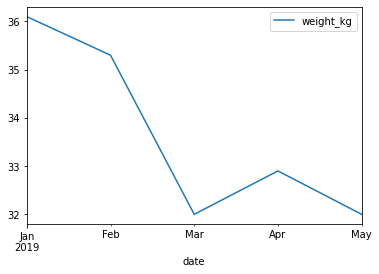

In [26]:
sully.plot(x = "date", y = "weight_kg", kind = "line")

### Rotating axis labels
We may want to rotate the x-axis labels to make the text easier to read. Here we rotate the labels by 45 degrees

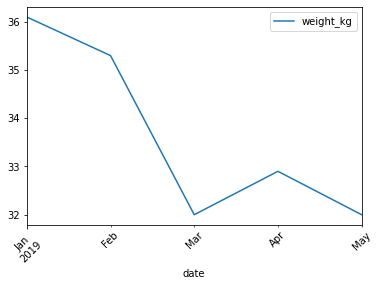

In [27]:
sully.plot(x = "date", y ="weight_kg", kind = "line", rot =45)

### Scatter Plots
Scatter plots are great for visualizing relationships between two numeric variables

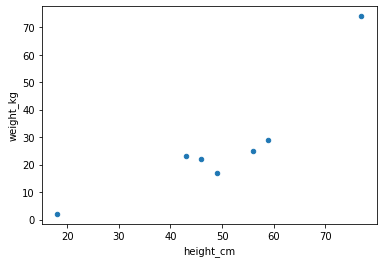

In [28]:
dog_pack.plot(x = "height_cm", y="weight_kg", kind ="scatter")

**Seems like taller dogs tend to weigh more**

### Layering Plots
Plots can also be layered on top of one another

In [41]:
dog_pack["sex"] = ["F", "M", "F", "M", "M", "F", "M"]

In [42]:
dog_pack

,name,breed,color,height_cm,weight_kg,sex
0,Bella,Labrador,Brown,56,25,F
1,Charlie,Poodle,Black,43,23,M
2,Lucy,Chow Chow,Brown,46,22,F
3,Cooper,Schnauzer,Grey,49,17,M
4,Max,Labrador,Black,59,29,M
5,Stella,Chihuahua,Tan,18,2,F
6,Bernie,St. Bernard,White,77,74,M


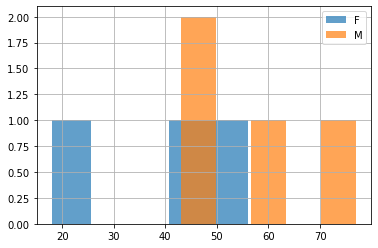

In [43]:
dog_pack[dog_pack["sex"] == "F"]["height_cm"].hist(alpha = 0.7, bins = 5)
dog_pack[dog_pack["sex"] == "M"]["height_cm"].hist(alpha = 0.7, bins = 5)
plt.legend(["F", "M"])
#Create a female histogram and put a male histogram on top

**We know which color is which, but we can't see what's going on behind the orange histogram. We can fix this problem by making the histograms translucent. We can take hist's alpha argument. 0 means completely transparent, that is, invisible and 1 means completely opaque**

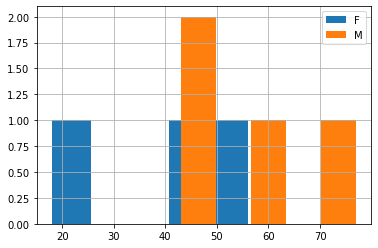

In [44]:
dog_pack[dog_pack["sex"] == "F"]["height_cm"].hist(bins = 5)
dog_pack[dog_pack["sex"] == "M"]["height_cm"].hist(bins = 5)
plt.legend(["F", "M"])

### Missing Values

In [45]:
dogs = pd.read_csv('dogs.csv')
dogs

,name,breed,color,height_cm,weight_kg
0,Bella,Labrador,Brown,56,25
1,Charlie,Poodle,Black,43,23
2,Lucy,Chow Chow,Brown,46,22
3,Cooper,Schnauzer,Grey,49,17
4,Max,Labrador,Black,59,29
5,Stella,Chihuahua,Tan,18,2
6,Bernie,St. Bernard,White,77,74


In [47]:
dogs.iloc[0,4] = np.nan
dogs.iloc[3, 4] = np.nan
dogs

,name,breed,color,height_cm,weight_kg
0,Bella,Labrador,Brown,56,NaN
1,Charlie,Poodle,Black,43,23.0
2,Lucy,Chow Chow,Brown,46,22.0
3,Cooper,Schnauzer,Grey,49,NaN
4,Max,Labrador,Black,59,29.0
5,Stella,Chihuahua,Tan,18,2.0
6,Bernie,St. Bernard,White,77,74.0


**Missing values indicated by nan means not a number**

In [49]:
# Detecting missing values
dogs.isna()
# Not helpful when working with a lot of data

,name,breed,color,height_cm,weight_kg
0,False,False,False,False,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,True
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False


In [51]:
# Detecting any missing values
dogs.isna().any()
# gives one value for each variable which tells us if there are missing values in that column

name         False
breed        False
color        False
height_cm    False
weight_kg     True
dtype: bool

In [52]:
# Counting missing values
dogs.isna().sum()

name         0
breed        0
color        0
height_cm    0
weight_kg    2
dtype: int64

### Plotting missing values

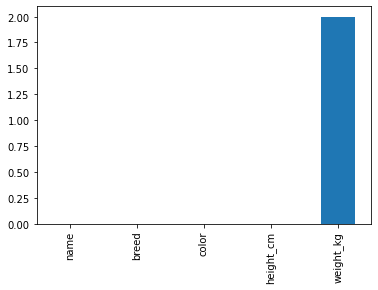

In [56]:
# Bar plot of missing values by variable
dogs.isna().sum().plot(kind = "bar")
plt.show()


In [54]:
# Removing missing values, one option is to remove the rows that 
# contain the missing values, using dropna method
# dogs.dropna()

In [55]:
# Replacing missing values
dogs.fillna(0)

,name,breed,color,height_cm,weight_kg
0,Bella,Labrador,Brown,56,0.0
1,Charlie,Poodle,Black,43,23.0
2,Lucy,Chow Chow,Brown,46,22.0
3,Cooper,Schnauzer,Grey,49,0.0
4,Max,Labrador,Black,59,29.0
5,Stella,Chihuahua,Tan,18,2.0
6,Bernie,St. Bernard,White,77,74.0
